In [1]:
import pandas as pd
import numpy as np
import os
import warnings

from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 10)

warnings.simplefilter('ignore')

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12,8)

file_path = 'D:\\mydata\\데이터분석\\FastCampus_전처리\\part-5.-머신러닝-모델의-성능-향상을-위한-전처리\\5. 머신러닝 모델의 성능 향상을 위한 전처리\\데이터'

In [2]:
df = pd.read_csv(file_path+'\\Telco_churn_prediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 컬럼 별 Null과 정상값 여부 탐지

- 컬럼 별로 Null은 .info() 상으로 존재하지 않음
- null 이외에 정상적이지 않은 값이 있을 수 있음

In [3]:
# 컬럼별 .unique() 값을 정렬하여 상위 10개 확인
for col in df.columns:
    print(col,' : ',sorted(df[col].unique())[:10])

customerID  :  ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', '0013-EXCHZ', '0013-MHZWF', '0013-SMEOE', '0014-BMAQU', '0015-UOCOJ', '0016-QLJIS']
gender  :  ['Female', 'Male']
SeniorCitizen  :  [0, 1]
Partner  :  ['No', 'Yes']
Dependents  :  ['No', 'Yes']
tenure  :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
PhoneService  :  ['No', 'Yes']
MultipleLines  :  ['No', 'No phone service', 'Yes']
InternetService  :  ['DSL', 'Fiber optic', 'No']
OnlineSecurity  :  ['No', 'No internet service', 'Yes']
OnlineBackup  :  ['No', 'No internet service', 'Yes']
DeviceProtection  :  ['No', 'No internet service', 'Yes']
TechSupport  :  ['No', 'No internet service', 'Yes']
StreamingTV  :  ['No', 'No internet service', 'Yes']
StreamingMovies  :  ['No', 'No internet service', 'Yes']
Contract  :  ['Month-to-month', 'One year', 'Two year']
PaperlessBilling  :  ['No', 'Yes']
PaymentMethod  :  ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
MonthlyCharges  :  [18.25, 

In [4]:
# 컬럼별 .unique() 값을 정렬하여 하위 10개 확인
for col in df.columns:
    print(col,' : ',sorted(df[col].unique())[-10:])

customerID  :  ['9975-SKRNR', '9978-HYCIN', '9979-RGMZT', '9985-MWVIX', '9986-BONCE', '9987-LUTYD', '9992-RRAMN', '9992-UJOEL', '9993-LHIEB', '9995-HOTOH']
gender  :  ['Female', 'Male']
SeniorCitizen  :  [0, 1]
Partner  :  ['No', 'Yes']
Dependents  :  ['No', 'Yes']
tenure  :  [63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
PhoneService  :  ['No', 'Yes']
MultipleLines  :  ['No', 'No phone service', 'Yes']
InternetService  :  ['DSL', 'Fiber optic', 'No']
OnlineSecurity  :  ['No', 'No internet service', 'Yes']
OnlineBackup  :  ['No', 'No internet service', 'Yes']
DeviceProtection  :  ['No', 'No internet service', 'Yes']
TechSupport  :  ['No', 'No internet service', 'Yes']
StreamingTV  :  ['No', 'No internet service', 'Yes']
StreamingMovies  :  ['No', 'No internet service', 'Yes']
Contract  :  ['Month-to-month', 'One year', 'Two year']
PaperlessBilling  :  ['No', 'Yes']
PaymentMethod  :  ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
MonthlyCharges  :

## 이상 컬럼 탐지

- TotalCharges 의 경우 값들은 float 형이 맞지만, ' ' 값으로 인해 object형인 것으로 보임
- ' '값은 Null 처리하여 결측값 처리 프로세스에 포함시킨다
- type을 float으로 조정해준다

In [5]:
df['TotalCharges'].replace(' ', np.nan, inplace = True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [6]:
df['TotalCharges'].dtypes

dtype('float64')

# 학습 모델 생성 시작

In [7]:
X = df.drop(['customerID', 'Churn'], axis=1)
Y = df['Churn']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [9]:
x_train.shape

(5282, 19)

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 2446 to 191
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   object 
 6   MultipleLines     5282 non-null   object 
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  StreamingTV       5282 non-null   object 
 13  StreamingMovies   5282 non-null   object 
 14  Contract          5282 non-null   object 
 15  PaperlessBilling  5282 non-null   object 
 16  PaymentMethod     5282 non-null   object

# 범주형 변수와 연속형 변수 분리 - One Hot Encoding

---

gender  :  ['Female', 'Male'] <br>
SeniorCitizen  :  [0, 1] <br>
Partner  :  ['No', 'Yes'] <br>
Dependents  :  ['No', 'Yes'] <br>
tenure  :  [63, 64, 65, 66, 67, 68, 69, 70, 71, 72] <br>
PhoneService  :  ['No', 'Yes'] <br>
MultipleLines  :  ['No', 'No phone service', 'Yes'] <br>
InternetService  :  ['DSL', 'Fiber optic', 'No'] <br>
OnlineSecurity  :  ['No', 'No internet service', 'Yes'] <br>
OnlineBackup  :  ['No', 'No internet service', 'Yes'] <br>
DeviceProtection  :  ['No', 'No internet service', 'Yes'] <br>
TechSupport  :  ['No', 'No internet service', 'Yes'] <br>
StreamingTV  :  ['No', 'No internet service', 'Yes'] <br>
StreamingMovies  :  ['No', 'No internet service', 'Yes'] <br>
Contract  :  ['Month-to-month', 'One year', 'Two year'] <br>
PaperlessBilling  :  ['No', 'Yes'] <br>
PaymentMethod  :  ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'] <br>
MonthlyCharges  :  [117.35, 117.45, 117.5, 117.6, 117.8, 118.2, 118.35, 118.6, 118.65, 118.75] <br>
TotalCharges  :  ['995.35', '996.45', '996.85', '996.95', '997.65', '997.75', '998.1', '999.45', '999.8', '999.9'] <br>

---

- 앞서 확인했던 컬럼 정보를 활용한다면, object형 변수들에 대해 인코딩을 해줄 필요가 있음

In [11]:
category_columns = [col for col in x_train.columns if x_train[col].dtypes=='object']
category_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [12]:
from sklearn.preprocessing import OneHotEncoder as OHE

dummy_model = OHE(drop='first').fit(x_train[category_columns].values)
tmp_train = pd.DataFrame(dummy_model.transform(x_train[category_columns].values).toarray())
tmp_test = pd.DataFrame(dummy_model.transform(x_test[category_columns].values).toarray())

In [13]:
def make_suffix(df):
    import pandas as pd
    
    cols_name=[]
    suffix_cols=[]
    
    for col in df.columns:
        values = sorted(df[col].unique())
        suffix_cols += values[1:]
        cols_name += [col] * (len(values)-1)
        
    return list(pd.Series(cols_name)+'_'+pd.Series(suffix_cols))

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse=False).fit(x_train[category_columns])
x_train_ohe = pd.DataFrame(ohe.transform(x_train[category_columns]), columns = make_suffix(x_train[category_columns]))
x_test_ohe = pd.DataFrame(ohe.transform(x_test[category_columns]), columns = make_suffix(x_test[category_columns]))

x_train_ohe.index = x_train.index
x_test_ohe.index = x_test.index

x_train = pd.concat([x_train.drop(category_columns, axis=1), x_train_ohe], axis=1)
x_test = pd.concat([x_test.drop(category_columns, axis=1), x_test_ohe], axis=1)

# 결측값 처리하기

In [15]:
from sklearn.impute import KNNImputer

KI = KNNImputer(n_neighbors=5)
KI.fit(x_train)
x_train = pd.DataFrame(KI.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(KI.transform(x_test), columns=x_test.columns)

In [16]:
x_train.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

# 연속형, 범주형 변수 분리

In [17]:
# 컬럼별 .unique() 값을 정렬하여 하위 10개 확인
for col in x_train.columns:
    print(col,' : ',sorted(x_train[col].unique())[-10:],'::: ',len(x_train[col].unique()))

SeniorCitizen  :  [0.0, 1.0] :::  2
tenure  :  [63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0] :::  73
MonthlyCharges  :  [117.15, 117.35, 117.45, 117.5, 117.6, 118.2, 118.35, 118.6, 118.65, 118.75] :::  1471
TotalCharges  :  [8476.5, 8477.6, 8477.7, 8529.5, 8543.25, 8547.15, 8564.75, 8594.4, 8670.1, 8672.45] :::  4978
gender_Male  :  [0.0, 1.0] :::  2
Partner_Yes  :  [0.0, 1.0] :::  2
Dependents_Yes  :  [0.0, 1.0] :::  2
PhoneService_Yes  :  [0.0, 1.0] :::  2
MultipleLines_No phone service  :  [0.0, 1.0] :::  2
MultipleLines_Yes  :  [0.0, 1.0] :::  2
InternetService_Fiber optic  :  [0.0, 1.0] :::  2
InternetService_No  :  [0.0, 1.0] :::  2
OnlineSecurity_No internet service  :  [0.0, 1.0] :::  2
OnlineSecurity_Yes  :  [0.0, 1.0] :::  2
OnlineBackup_No internet service  :  [0.0, 1.0] :::  2
OnlineBackup_Yes  :  [0.0, 1.0] :::  2
DeviceProtection_No internet service  :  [0.0, 1.0] :::  2
DeviceProtection_Yes  :  [0.0, 1.0] :::  2
TechSupport_No internet service  :  [0.0, 1.

In [18]:
cont_cols = [col for col in x_train.columns if len(x_train[col].unique())>3]
cate_cols = [col for col in x_train.columns if len(x_train[col].unique())<=3]

In [19]:
cont_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
print(cate_cols)

['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [21]:
x_test.shape

(1761, 30)

# 이상치 처리

In [22]:
def IQR_Rule(val_list):
    q1 = np.quantile(val_list, 0.25)
    q3 = np.quantile(val_list, 0.75)
    IQR = q3-q1
    not_outlier_cond = (q1-1.5*IQR < val_list) & (q3+1.5*IQR > val_list)
    
    return not_outlier_cond

num_outliers = len(x_train) - x_train[cont_cols].apply(IQR_Rule).sum(axis=0)
print(num_outliers)

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x23df1f9c460>,
 'caps': [<matplotlib.lines.Line2D at 0x23df1f9cb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x23df1f9c100>],
 'medians': [<matplotlib.lines.Line2D at 0x23df1fa9220>],
 'fliers': [<matplotlib.lines.Line2D at 0x23df1fa9580>],
 'means': []}

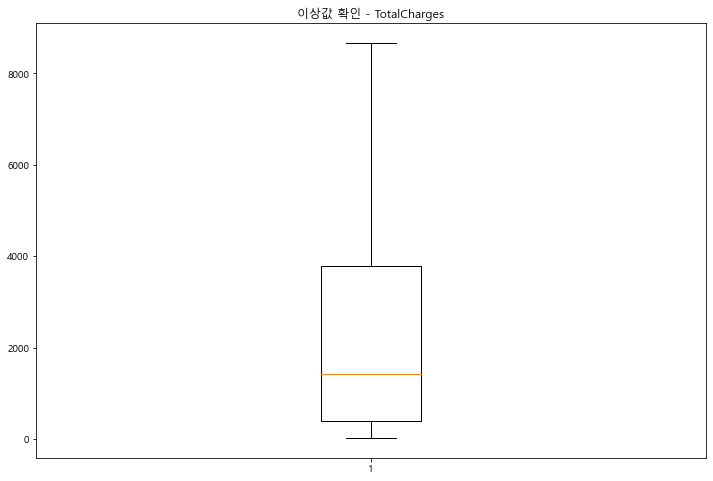

In [23]:
plt.title('이상값 확인 - TotalCharges')
plt.boxplot(x_train['TotalCharges'])

In [24]:
x_train.loc[x_train['TotalCharges']==x_train['TotalCharges'].max()]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
585,0.0,72.0,118.75,8672.45,0.0,...,1.0,1.0,0.0,0.0,0.0


In [25]:
x_train.drop(index=1136, axis=0, inplace=True)
y_train.drop(index=1136, axis=0, inplace=True)

# 라벨 분포 확인

- 라벨 분포를 확인한다
- 불균형이 심할 경우 라벨을 채워준다

In [26]:
# 라벨 인코딩
y_train.replace({'Yes':1, 'No':-1}, inplace=True)
y_test.replace({'Yes':1, 'No':-1}, inplace=True)

In [27]:
y_train.value_counts() # 약 두배 차이

-1    3875
 1    1406
Name: Churn, dtype: int64

In [28]:
print(x_train.shape)
print(y_train.shape)

(5281, 30)
(5281,)


In [29]:
# knn으로 불균형 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors=3).fit(x_train, y_train)
y_pred = kNN_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7132311186825667


- KNN으로만 봣을 때는 높은 점수를 보이기 때문에 오버 샘플링을 하지 않고 수행해 보자

In [2]:
'''
from imblearn.over_sampling import SMOTE

oversampling_instance = SMOTE(k_neighbors=3)
o_x_train, o_y_train = oversampling_instance.fit_resample(x_train, y_train)
o_x_train = pd.DataFrame(o_x_train, columns=x_train.columns)
o_y_train = pd.Series(o_y_train)
'''

In [37]:
'''
from sklearn.neighbors import KNeighborsClassifier as KNN
kNN_model = KNN(n_neighbors=3).fit(o_x_train, o_y_train)
y_pred = kNN_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
'''

0.6115843270868825


# 자기 상관 확인하기

In [38]:
from sklearn.linear_model import LinearRegression as LR

VIF_dict = dict()

for col in x_train.columns:
    model = LR().fit(x_train.drop([col],axis=1), x_train[col])
    r2 = model.score(x_train.drop([col],axis=1), x_train[col])
    VIF = 1/(1-r2)
    VIF_dict[col] = VIF

In [40]:
VIF_dict

{'SeniorCitizen': 1.1516926821232825,
 'tenure': 7.575799650762939,
 'MonthlyCharges': 852.0241058483269,
 'TotalCharges': 10.89492735711677,
 'gender_Male': 1.0031785835245932,
 'Partner_Yes': 1.4622283870291652,
 'Dependents_Yes': 1.3915396602098138,
 'PhoneService_Yes': inf,
 'MultipleLines_No phone service': inf,
 'MultipleLines_Yes': 7.184309137236985,
 'InternetService_Fiber optic': 147.00719528769582,
 'InternetService_No': inf,
 'OnlineSecurity_No internet service': inf,
 'OnlineSecurity_Yes': 6.297781344357839,
 'OnlineBackup_No internet service': inf,
 'OnlineBackup_Yes': 6.7855570722846075,
 'DeviceProtection_No internet service': inf,
 'DeviceProtection_Yes': 6.7806335002864895,
 'TechSupport_No internet service': inf,
 'TechSupport_Yes': 6.388191558185368,
 'StreamingTV_No internet service': inf,
 'StreamingTV_Yes': 23.821811796009158,
 'StreamingMovies_No internet service': inf,
 'StreamingMovies_Yes': 23.780409487425526,
 'Contract_One year': 1.64651589129942,
 'Contract

In [41]:
remove_cols = [key for key in VIF_dict.keys() if VIF_dict[key] > 30]
remove_cols

['MonthlyCharges',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [45]:
v_x_train = x_train.drop(remove_cols, axis=1)
v_x_test = x_test.drop(remove_cols, axis=1)

v_cont_cols = list(set(cont_cols)-set(remove_cols))
v_cate_cols = list(set(cate_cols)-set(remove_cols))

# 왜도 확인하기

In [43]:
x_train[cont_cols].skew() # 1.5를 넘는 값이 없으므로 진행

tenure            0.235433
MonthlyCharges   -0.214805
TotalCharges      0.964461
dtype: float64

In [46]:
v_x_train[v_cont_cols].skew()

tenure          0.235433
TotalCharges    0.964461
dtype: float64

# 스케일링

In [57]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler().fit(x_train)
s_x_train = pd.DataFrame(MMS.transform(x_train), columns = x_train.columns)
s_x_test = pd.DataFrame(MMS.transform(x_test),columns = x_test.columns)

In [48]:
s_x_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.250000,0.713930,0.174325,0.0,...,0.0,1.0,1.0,0.0,0.0
1,0.0,1.000000,0.952736,0.933057,1.0,...,1.0,1.0,0.0,1.0,0.0
2,0.0,0.583333,0.452239,0.317155,1.0,...,0.0,0.0,1.0,0.0,0.0
3,0.0,0.902778,0.065174,0.182830,1.0,...,0.0,0.0,1.0,0.0,0.0
4,0.0,1.000000,0.967662,0.971422,0.0,...,1.0,1.0,0.0,1.0,0.0


# 특징 선택과 하이퍼 파라미터 튜닝

In [53]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.feature_selection import *
from sklearn.model_selection import ParameterGrid as PG
from sklearn.metrics import f1_score, classification_report

# 파라미터 그리드 설계
model_param_grid = dict()

model_param_grid[RFC] = PG({'max_depth':[2,3,4,5,6],
                            'n_estimators':[5,25,50,100,200]})
model_param_grid[LGR] = PG({'C':[0.0001,0.001,0.1,0.05,0.1],
                            'max_iter':[10,100,1000,10000]})
model_param_grid[DTC] = PG({'max_depth':np.arange(2,10),
                            'min_samples_leaf':np.arange(1,5)})
model_param_grid[KNN] = PG({'n_neighbors':[3,5,7,9]})

In [54]:
# 특징 선택
cont_cols_pval = f_classif(s_x_train[cont_cols], y_train)[1]
cate_cols_pval = chi2(s_x_train[cate_cols], y_train)[1]

cont_pvals = pd.Series(cont_cols_pval, index = cont_cols)
cate_pvals = pd.Series(cate_cols_pval, index = cate_cols)

pvals = pd.concat([cont_pvals,cate_pvals])
pvals.sort_values(ascending=True, inplace=True)

In [55]:
pvals

tenure                                   6.476488e-42
Contract_Two year                        1.580416e-20
PaymentMethod_Electronic check           7.034933e-19
InternetService_Fiber optic              5.426430e-18
TotalCharges                             1.060831e-15
StreamingMovies_No internet service      1.819663e-13
StreamingTV_No internet service          1.819663e-13
TechSupport_No internet service          1.819663e-13
DeviceProtection_No internet service     1.819663e-13
OnlineSecurity_No internet service       1.819663e-13
InternetService_No                       1.819663e-13
OnlineBackup_No internet service         1.819663e-13
MonthlyCharges                           4.362956e-12
Contract_One year                        2.460323e-11
OnlineSecurity_Yes                       9.364593e-09
SeniorCitizen                            3.966828e-08
TechSupport_Yes                          1.085423e-07
Dependents_Yes                           2.937967e-07
PaperlessBilling_Yes        

In [59]:
best_score = 0
for k in range(len(s_x_train.columns),5,-1):
    print(k)
    ss_x_train = s_x_train[pvals.iloc[:k].index]
    ss_x_test = s_x_test[pvals.iloc[:k].index]
    
    for M in model_param_grid.keys():
        for P in model_param_grid[M]:
            model = M(**P).fit(ss_x_train, y_train)
            y_pred = model.predict(ss_x_test)
            score = f1_score(y_test, y_pred, average='weighted')
            
            if score > best_score:
                score_arr = score
                report = classification_report(y_test, y_pred)
                best_score = score.mean()
                best_model = M
                best_params = P
                best_features = ss_x_train.columns

30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6


In [62]:
print(f'f1 : {score_arr}')
print(f'best_model : {M}')
print(f'best_params : {P}')
print(f'best_score : {best_score}')
print(f'best_features : {best_features}')
print('=========================================================')
print(report)

f1 : 0.7737518394752274
best_model : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
best_params : {'n_neighbors': 9}
best_score : 0.7737518394752274
best_features : Index(['tenure', 'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'TotalCharges',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No internet service',
       'DeviceProtection_No internet service',
       'OnlineSecurity_No internet service', 'InternetService_No',
       'OnlineBackup_No internet service', 'MonthlyCharges',
       'Contract_One year', 'OnlineSecurity_Yes', 'SeniorCitizen'],
      dtype='object')
              precision    recall  f1-score   support

          -1       0.81      0.93      0.87      1298
           1       0.68      0.41      0.51       463

    accuracy                           0.79      1761
   macro avg       0.75      0.67      0.69      1761
weighted avg       0.78      0.

In [63]:
kNN_model = KNN(n_neighbors=9).fit(s_x_train[best_features], y_train)
y_pred = kNN_model.predict(s_x_test[best_features])
print(accuracy_score(y_test, y_pred))

0.7649063032367973
